In [1]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

In [2]:
bank_data = pd.read_csv("../b. Datasets/Bank Client Term Deposit/Bank Client Term Deposit.csv")

In [3]:
display(bank_data.head(2))
display(bank_data.tail(2))

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205,2,999,0,1.1,93.994,-36.4,4.858,5191.0,no
1,32,691,10,999,0,1.4,93.918,-42.7,4.960,5228.1,yes


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
9638,39,233,1,999,0,1.4,94.465,-41.8,4.864,5228.1,no
9639,35,417,1,999,0,1.4,94.465,-41.8,4.962,5228.1,no


In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9640 non-null   int64  
 1   duration        9640 non-null   int64  
 2   campaign        9640 non-null   int64  
 3   pdays           9640 non-null   int64  
 4   previous        9640 non-null   int64  
 5   emp.var.rate    9640 non-null   float64
 6   cons.price.idx  9640 non-null   float64
 7   cons.conf.idx   9640 non-null   float64
 8   euribor3m       9640 non-null   float64
 9   nr.employed     9640 non-null   float64
 10  y               9640 non-null   object 
dtypes: float64(5), int64(5), object(1)
memory usage: 828.6+ KB


In [5]:
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,9640.0,40.286618,11.901274,17.000,31.000,38.000,48.000,98.000
duration,9640.0,379.564004,354.768370,0.000,141.000,260.000,512.000,4199.000
campaign,9640.0,2.349170,2.384519,1.000,1.000,2.000,3.000,42.000
pdays,9640.0,893.100519,306.531615,0.000,999.000,999.000,999.000,999.000
previous,9640.0,0.306120,0.684605,0.000,0.000,0.000,0.000,6.000
emp.var.rate,9640.0,-0.460218,1.717852,-3.400,-1.800,-0.100,1.400,1.400
cons.price.idx,9640.0,93.485750,0.631366,92.201,92.893,93.444,93.994,94.767
cons.conf.idx,9640.0,-40.265373,5.322795,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,9640.0,3.003616,1.886179,0.634,1.250,4.076,4.959,5.045
nr.employed,9640.0,5137.407147,86.347481,4963.600,5076.200,5191.000,5228.100,5228.100


In [6]:
bank_data.isna().sum()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
for feature in bank_data.columns:
    print(f"Feature name: {feature}")
    print(bank_data[feature].unique())

Feature name: age
[32 45 33 47 25 36 43 52 34 48 40 51 38 53 23 57 46 79 39 35 56 31 26 27
 29 37 28 49 62 80 24 60 41 44 30 50 58 59 63 75 55 42 73 72 85 78 22 74
 66 21 77 65 64 54 71 83 82 88 69 18 61 70 19 67 86 68 20 81 17 76 87 84
 98 89 92]
Feature name: duration
[ 205  691   45 ... 2062 1514 1053]
Feature name: campaign
[ 2 10  8  1  3 26  4 15  6  5 14 11 13  9 12  7 17 28 32 30 20 18 33 16
 29 23 27 22 21 31 25 19 42]
Feature name: pdays
[999   5   3   8   6   4  13  18  10   9   7   2  19  12   0  16  15   1
  14  11  22  26  21  17  25  27]
Feature name: previous
[0 2 1 3 6 4 5]
Feature name: emp.var.rate
[ 1.1  1.4 -1.1 -1.8 -0.1 -2.9 -3.  -3.4 -0.2 -1.7]
Feature name: cons.price.idx
[93.994 93.918 93.444 94.601 93.075 92.843 93.2   92.963 94.465 92.893
 92.713 92.649 92.431 94.199 92.756 92.379 94.027 92.201 92.469 93.369
 93.876 94.215 94.767 93.749 93.798 94.055]
Feature name: cons.conf.idx
[-36.4 -42.7 -36.1 -49.5 -47.1 -50.  -42.  -40.8 -41.8 -46.2 -33.  -30.1
 -26.9 

In [8]:
colormaps = plt.colormaps()
print(colormaps)

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

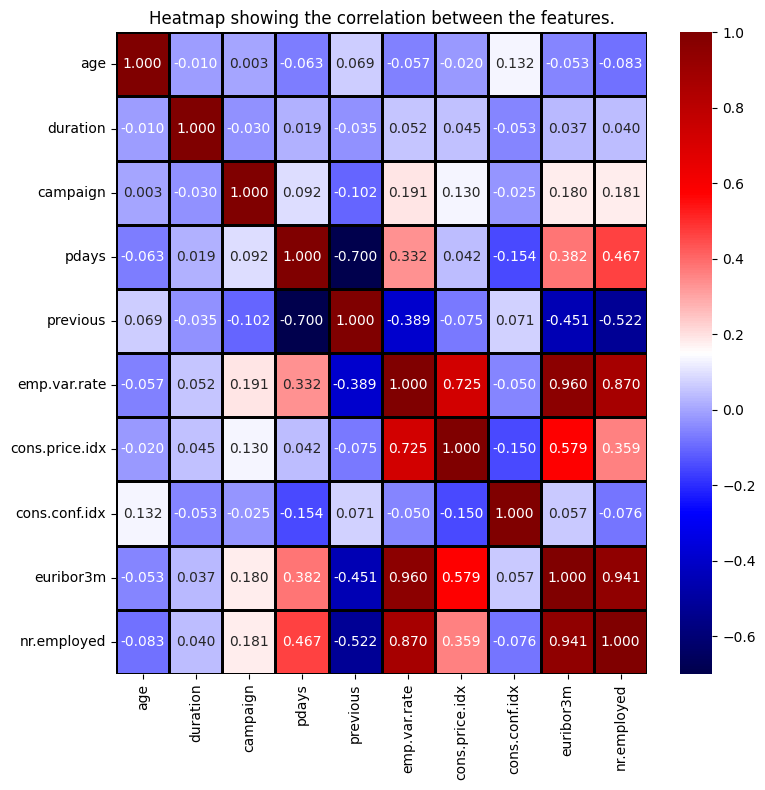

In [9]:
plt.figure(figsize=(8, 8))
sns.heatmap(bank_data.select_dtypes(include='number').corr(), annot=True, cmap='seismic', linewidths=0.8, linecolor="black", fmt='.3f')
plt.title("Heatmap showing the correlation between the features.")
plt.tight_layout()
plt.show()

In [10]:
initial_skew = bank_data.select_dtypes(include='number').skew()
initial_skew

age               0.990535
duration          2.256322
campaign          5.098841
pdays            -2.549356
previous          2.895599
emp.var.rate     -0.181234
cons.price.idx   -0.125216
cons.conf.idx     0.350442
euribor3m        -0.058332
nr.employed      -0.463581
dtype: float64

In [11]:
y_encoded = pd.get_dummies(bank_data['y'])
y_encoded.head(2)

,no,yes
0,True,False
1,False,True


In [12]:
y_encoded.drop(labels='no', axis=1, inplace=True)
y_encoded.rename(columns={'yes' : 'y'}, inplace=True)
y_encoded.head(2)

,y
0,False
1,True


In [13]:
bank_data.drop(labels='y', axis=1, inplace=True)
bank_data = pd.concat([bank_data, y_encoded], axis=1)
display(bank_data.head(2))
display(bank_data.tail(2))

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205,2,999,0,1.1,93.994,-36.4,4.858,5191.0,False
1,32,691,10,999,0,1.4,93.918,-42.7,4.960,5228.1,True


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
9638,39,233,1,999,0,1.4,94.465,-41.8,4.864,5228.1,False
9639,35,417,1,999,0,1.4,94.465,-41.8,4.962,5228.1,False


In [14]:
X = bank_data.drop(labels='y', axis=1)
y = bank_data['y']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    shuffle=True)

In [16]:
smote = SMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [17]:
gaussian_naive_bayes_model = GaussianNB()

stratified_f_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0, )

param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100), 
    'priors': [None, [0.5, 0.5], [0.3, 0.7], [0.7, 0.3]]
}

random_search_cv = RandomizedSearchCV(estimator=gaussian_naive_bayes_model,
                                      param_distributions=param_grid,
                                      cv=stratified_f_fold_cv,
                                      random_state=0,
                                      n_iter=30,
                                      n_jobs=-1)

random_search_cv.fit(X_train, y_train)
best_parameters = random_search_cv.best_params_
print("Best parameters are", best_parameters)
best_gnb_model = random_search_cv.best_estimator_

Best parameters are {'var_smoothing': np.float64(6.579332246575683e-05), 'priors': [0.3, 0.7]}


In [18]:
y_train_pred = best_gnb_model.predict(X_train) 
y_test_pred = best_gnb_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.8285144566301097
Test Accuracy: 0.8236514522821576


Confusion Matrix:


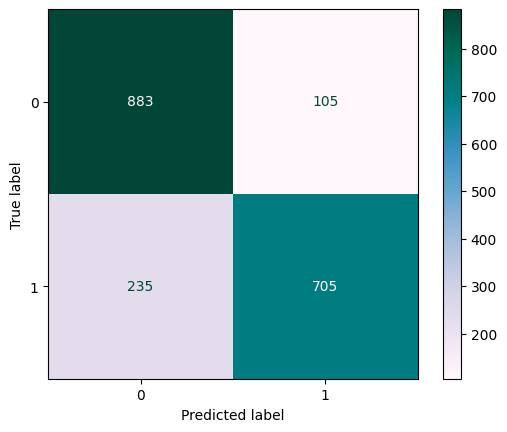

In [19]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
ConfusionMatrixDisplay(conf_matrix).plot(cmap="PuBuGn")

In [20]:
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.89      0.84       988
        True       0.87      0.75      0.81       940

    accuracy                           0.82      1928
   macro avg       0.83      0.82      0.82      1928
weighted avg       0.83      0.82      0.82      1928



In [21]:
cv_scores = cross_val_score(best_gnb_model, X_test, y_test, cv=10, scoring='accuracy')
average_accuracy = np.mean(cv_scores)
print(f"Average Accuracy from 10-fold cross-validation: {average_accuracy*100:.3f}%.")

Average Accuracy from 10-fold cross-validation: 82.624%.


In [22]:
y_test_probability = best_gnb_model.predict_proba(X_test)
y_test_probability = y_test_probability[:, 1]
print(f"Area Under the Receiver Operating Characteristic Curve is {roc_auc_score(y_test, y_test_probability)}")

Area Under the Receiver Operating Characteristic Curve is 0.9163413084675682


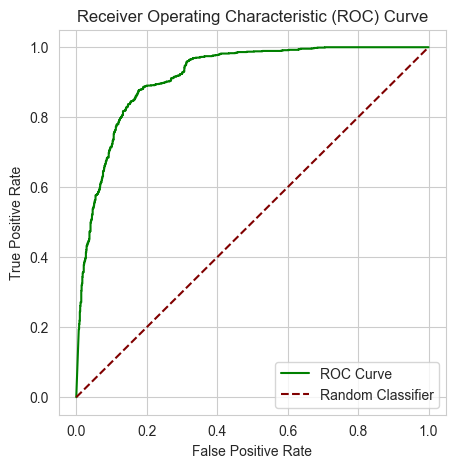

In [23]:
fpr, tpr, _ = roc_curve(y_test, y_test_probability)

plt.figure(figsize=(5, 5))
sns.set_style('whitegrid')
plt.plot(fpr, tpr, color='green', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='maroon', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [24]:
submission_dataframe = pd.DataFrame({
    'Index': X_test.index,
    'y': y_test_pred
})
submission_dataframe.sort_values(by="Index", inplace=True)
submission_dataframe.head(2)

,Index,y
21,9,False
608,15,False


In [25]:
submission_dataframe_file = '../d. Output Files/BankClientTermDeposit/' + 'BankClientTermDeposit_Prediction.csv'
print(f"File name: {submission_dataframe_file.split('/')[3]}")
submission_dataframe.to_csv(submission_dataframe_file, index=False)

File name: BankClientTermDeposit_Prediction.csv
